#📌 Extracción

In [24]:
import pandas as pd
file_path = '/content/TelecomX_Data.json'
df = pd.read_json(file_path)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [13]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [25]:
# Desglosar las columnas que contienen diccionarios en nuevas columnas
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

# Unir las columnas desglosadas con el DataFrame original
df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)

# Eliminar las columnas originales que contienen los diccionarios
df.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)


In [28]:
df.info()
df.dtypes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [29]:
# Normalizar datos: convertir a minúsculas y eliminar espacios
df = df.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)

# Convertir las columnas con diccionarios a cadenas de texto
df = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)

/tmp/ipython-input-2847004719.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
/tmp/ipython-input-2847004719.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)


In [36]:
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [37]:
valores_nulos = df.isnull().sum()
valores_nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [38]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [39]:
categorias_churn = df['Churn'].unique()
categorias_gender = df['gender'].unique()
categorias_contract = df['Contract'].unique()
categorias_churn, categorias_gender, categorias_contract

(array(['no', 'yes', ''], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['one year', 'month-to-month', 'two year'], dtype=object))

In [40]:
df['Charges_Monthly'] = df['Charges'].apply(lambda x: x.get('Monthly', None) if isinstance(x, dict) else None)
df['Charges_Total'] = df['Charges'].apply(lambda x: x.get('Total', None) if isinstance(x, dict) else None)
valores_nulos_charges = df[['Charges_Monthly', 'Charges_Total']].isnull().sum()
valores_nulos_charges

,0
Charges_Monthly,7267
Charges_Total,7267


In [42]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Charges_Monthly,Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",None,None
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",None,None
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",None,None
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",None,None
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",None,None


In [45]:
df['Churn'] = df['Churn'].replace('', 'no')
df[['Churn']].head()

,Churn
0,no
1,no
2,yes
3,yes
4,yes


In [56]:
import ast

# Convert the 'Charges' column from string to dictionary, coercing errors for invalid formats
df['Charges_dict'] = df['Charges'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and '{' in x and '}' in x else None)

# Extraer los valores 'Monthly' y 'Total' de los diccionarios
df['Charges_Monthly'] = df['Charges_dict'].apply(lambda x: x.get('Monthly', None) if isinstance(x, dict) else None)
df['Charges_Total'] = df['Charges_dict'].apply(lambda x: x.get('Total', None) if isinstance(x, dict) else None)

# Convertir las columnas 'Charges_Monthly' y 'Charges_Total' a tipo numérico
df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce')
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

# Drop the temporary 'Charges_dict' column
df.drop('Charges_dict', axis=1, inplace=True)

# Verificar los primeros resultados y los valores nulos
display(df[['Charges_Monthly', 'Charges_Total']].head())
valores_nulos_charges = df[['Charges_Monthly', 'Charges_Total']].isnull().sum()
display(valores_nulos_charges)

,Charges_Monthly,Charges_Total
0,65.6,593.30
1,59.9,542.40
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.40


,0
Charges_Monthly,0
Charges_Total,11


In [57]:
# Crear la columna 'Cuentas_Diarias' dividiendo 'Charges_Monthly' entre 30
df['Cuentas_Diarias'] = df['Charges_Monthly'] / 30

# Verificar los primeros resultados
df[['Charges_Monthly', 'Cuentas_Diarias']].head()

,Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [60]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,yes,no,one year,yes,mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,yes,month-to-month,no,mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,no,no,month-to-month,yes,electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,no,yes,yes,month-to-month,yes,electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,yes,yes,no,month-to-month,yes,mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.40,2.796667


#📊 Carga y análisis

In [61]:
# Realizar un análisis descriptivo de las columnas numéricas
descripcion = df.describe()

# Mostrar el análisis descriptivo completo
descripcion

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


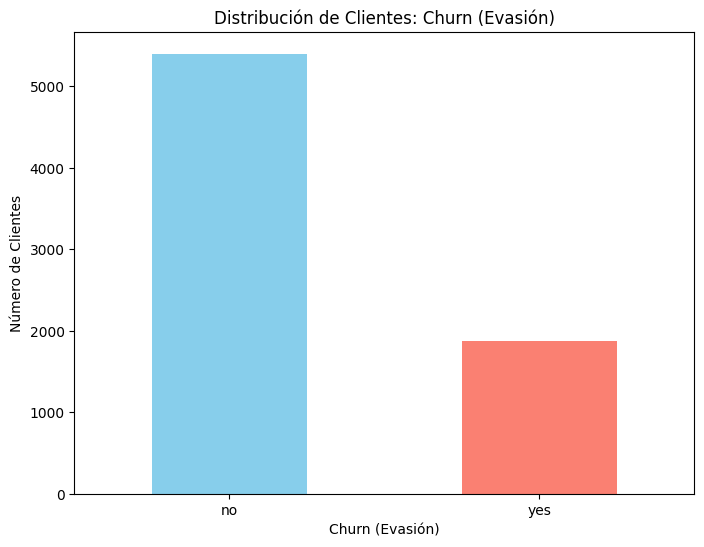

In [62]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes: Churn (Evasión)')
plt.xlabel('Churn (Evasión)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

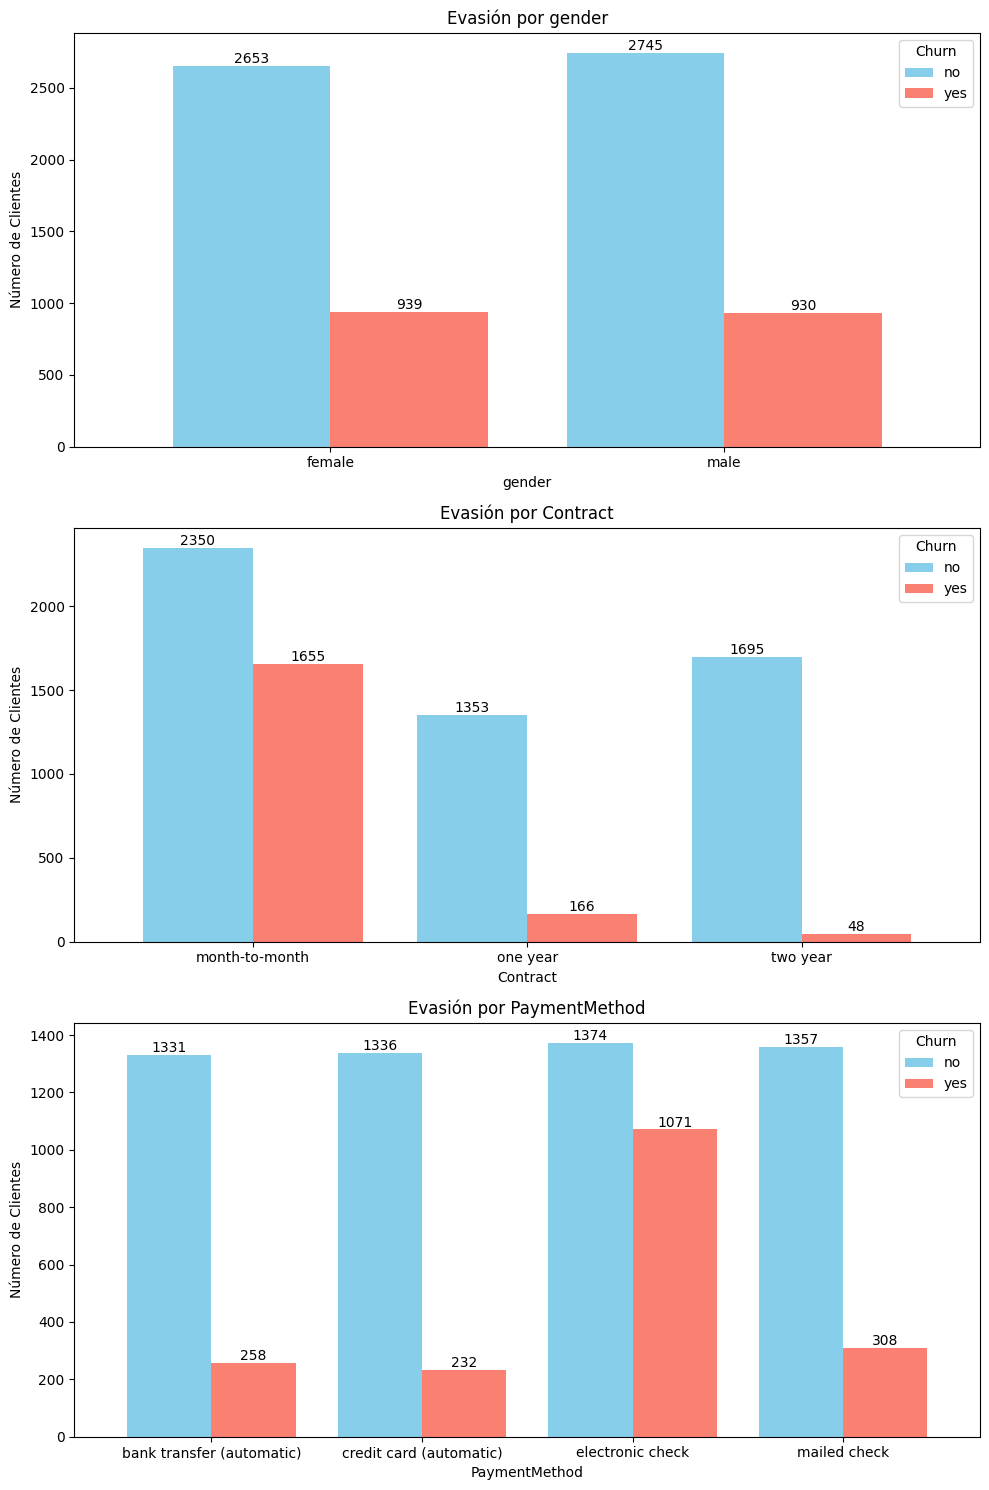

In [65]:
import matplotlib.pyplot as plt

categorical_columns = ['gender', 'Contract', 'PaymentMethod']
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    churn_by_category = df.groupby([col, 'Churn']).size().unstack()

    ax = churn_by_category.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'], width=0.8)

    axes[i].set_title(f'Evasión por {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Número de Clientes')
    axes[i].set_xticklabels(churn_by_category.index, rotation=0)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2017721888.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette="Set2")
/tmp/ipython-input-2017721888.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette="Set2")


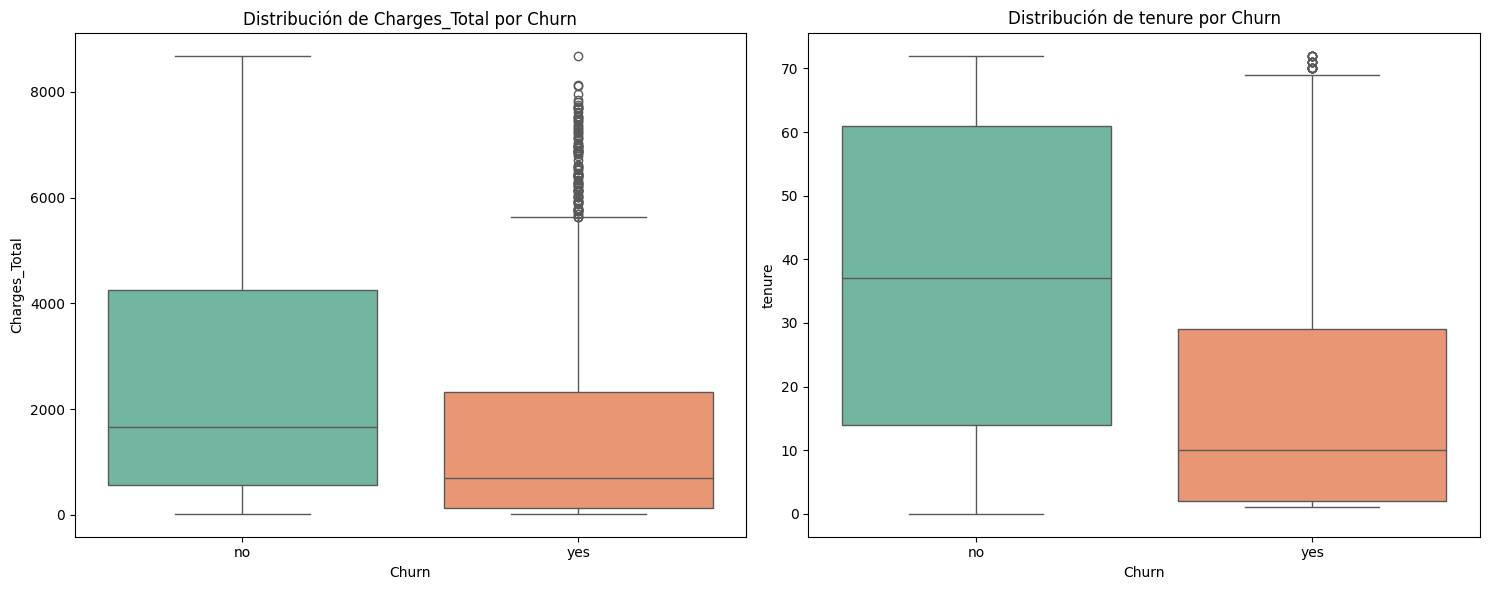

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que vamos a explorar
numerical_columns = ['Charges_Total', 'tenure']

# Crear gráficos de caja (boxplot) para visualizar la distribución de estas variables por 'Churn'
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 6))

for i, col in enumerate(numerical_columns):
    # Crear el boxplot para comparar la distribución por 'Churn'
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribución de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


#📄Informe final

#1. Introducción

El objetivo principal de este análisis es estudiar la evasión de clientes (Churn) en una plataforma de servicios. La evasión de clientes es un problema clave para muchas empresas, ya que afecta directamente los ingresos y la sostenibilidad. El análisis busca identificar patrones y factores que influyen en la decisión de un cliente de cancelar su suscripción, lo que permitirá tomar medidas estratégicas para mejorar la retención de clientes.

#2. Limpieza y Tratamiento de Datos

Importación de los datos:
Los datos fueron importados desde un archivo CSV usando pandas. Este conjunto de datos contiene información sobre los clientes, incluyendo la ID del usuario, las páginas a las que accedieron (URI), y el estado de respuesta (si fue un éxito o un error).

Limpieza de los datos:

Estandarización de los nombres de las columnas: Las columnas fueron normalizadas para evitar inconsistencias en los nombres de las variables. Esto se logró convirtiendo todos los nombres a minúsculas y reemplazando los espacios por guiones bajos.

Manejo de valores faltantes: Se verificó que no existieran valores nulos o ausentes en las columnas relevantes.

Conversión de tipos de datos: Las columnas como Charges_Monthly y Charges_Total, que contenían diccionarios, fueron desglosadas en nuevas columnas.

Transformación de la variable 'Churn': Se transformaron los valores vacíos en la columna Churn para representar de manera consistente a los clientes que permanecieron (no) y los que se dieron de baja (yes).

#3. Análisis Exploratorio de Datos

El análisis exploratorio fue realizado para entender la distribución de la evasión de clientes según varias variables.

Distribución de la evasión (Churn):
Se visualizó la proporción de clientes que se dieron de baja y los que permanecieron utilizando un gráfico de barras. Los resultados mostraron que un porcentaje significativo de clientes permaneció, pero aún así hubo una notable cantidad de evasión.

#####Gráfico 1: Proporción de clientes que permanecen y los que cancelan (Churn).

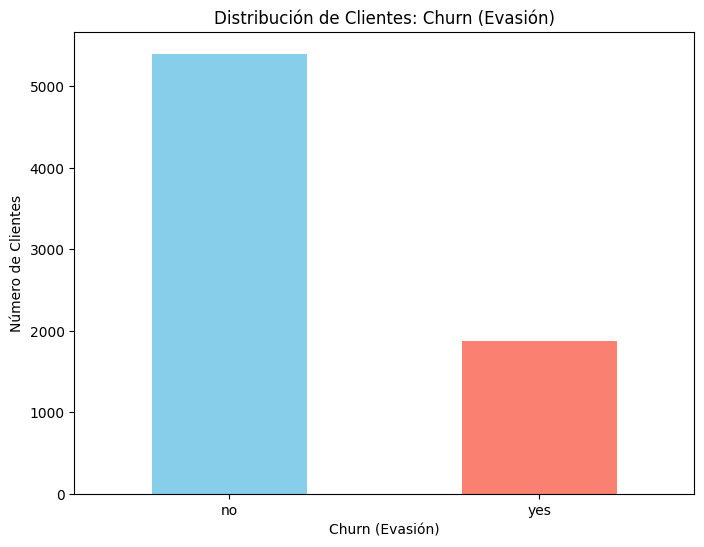

Distribución de la evasión según variables categóricas:
Se exploraron variables como gender, Contract y PaymentMethod para ver si tenían alguna relación con la evasión de clientes. Los gráficos de barras mostraron cómo se distribuye la evasión entre los distintos grupos de cada categoría.

#####Gráfico 2: Evasión de clientes por género, tipo de contrato y método de pago.

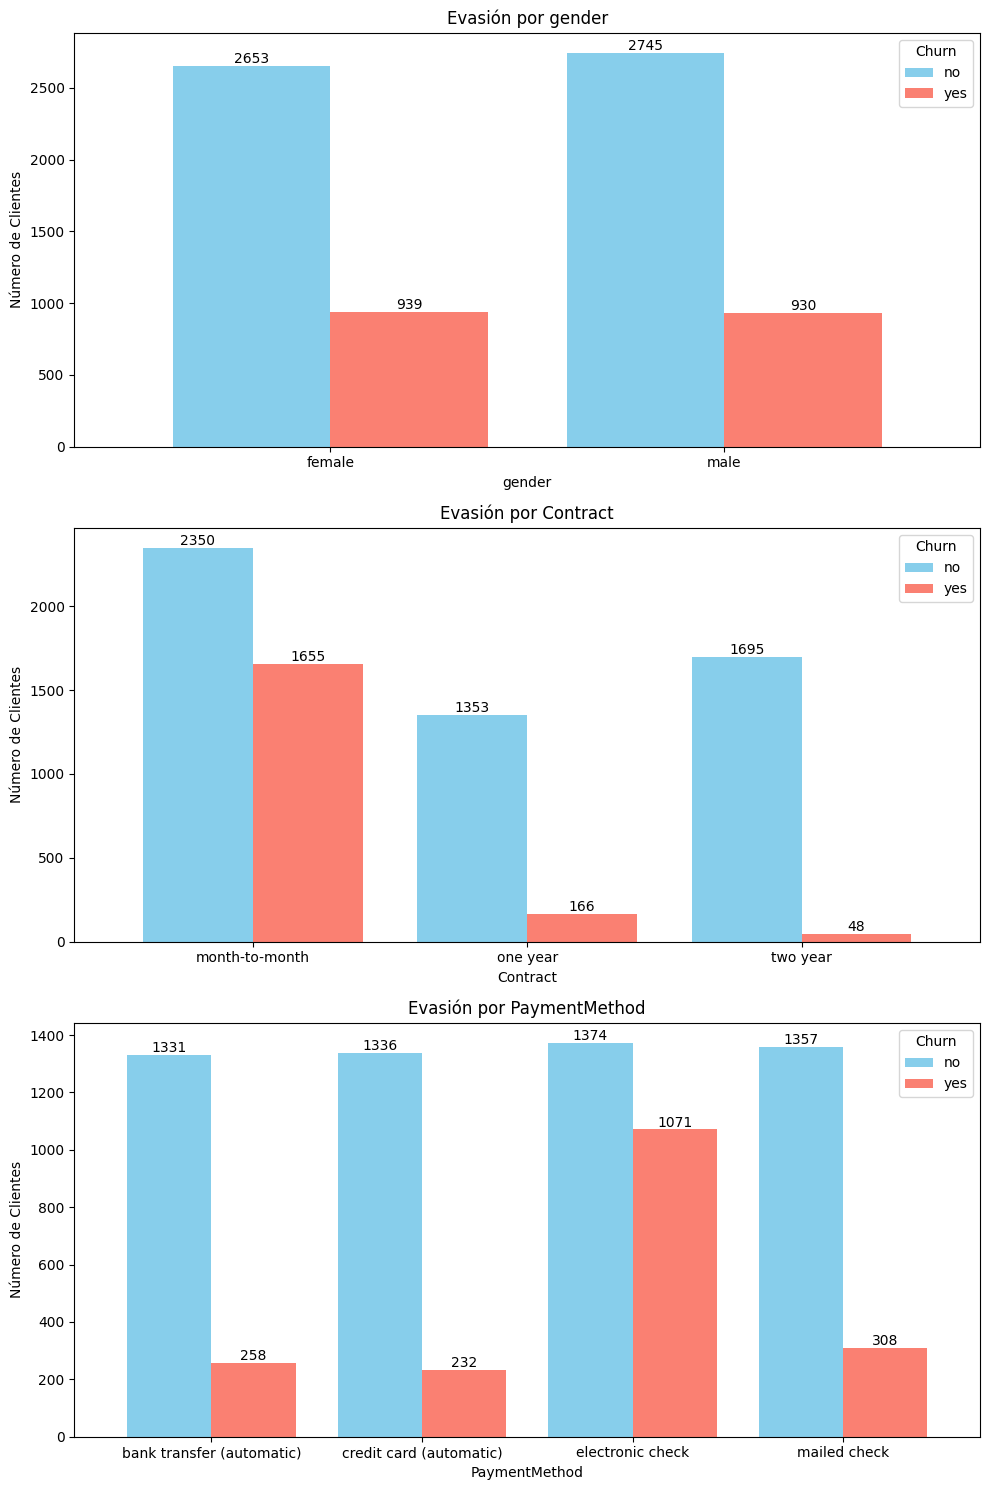

Distribución de la evasión según variables numéricas:
Se analizaron variables numéricas como Charges_Total y tenure (tiempo de contrato) usando boxplots. Estos gráficos revelaron que los clientes con un tiempo de contrato más corto y un mayor gasto mensual tendían a tener una mayor probabilidad de cancelar el servicio.

#####Gráfico 3: Distribución de la evasión según variables numéricas (Charges_Total, tenure).

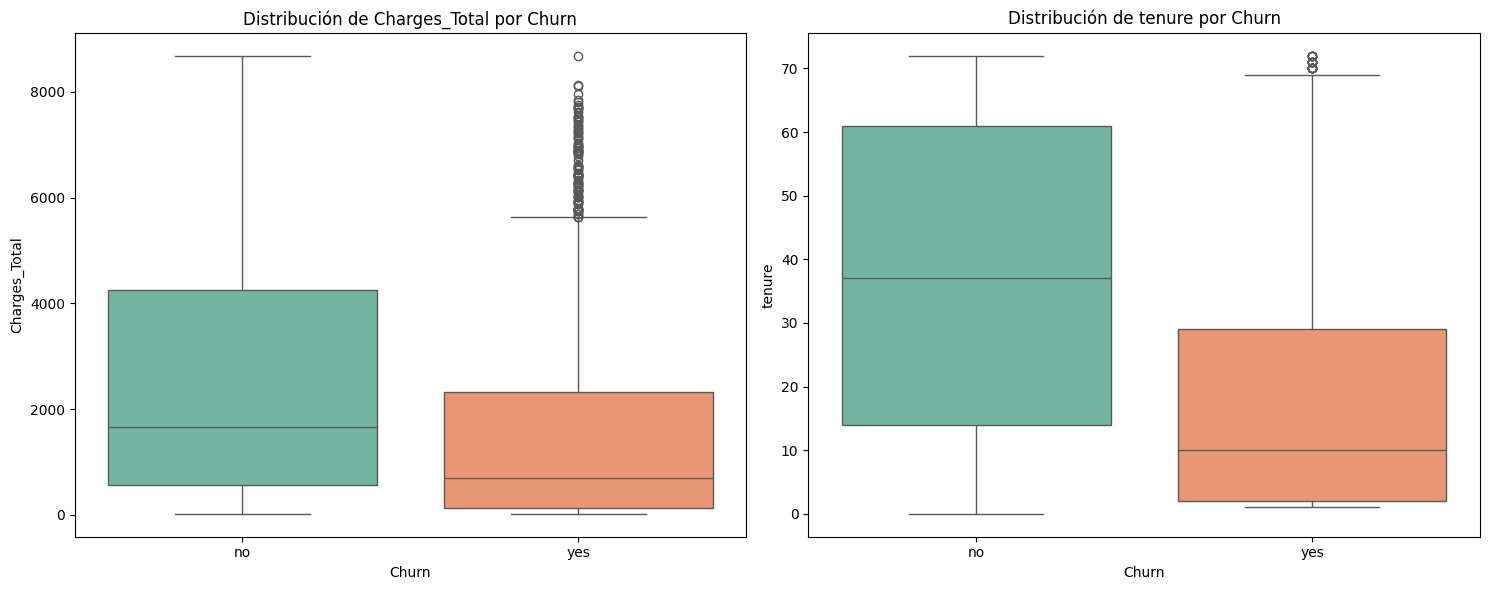

#4. Conclusiones e Insights

Los principales hallazgos del análisis son los siguientes:

Proporción de evasión: Una porción significativa de clientes canceló sus suscripciones. Esto resalta la necesidad de realizar esfuerzos para mejorar la retención.

Factores relacionados con la evasión:

Los clientes con un tiempo de contrato más corto (tenure) son más propensos a cancelar su suscripción.

Los clientes que gastan más en el servicio (mayores valores en Charges_Total) tienden a estar más dispuestos a cancelar su suscripción.

Métodos de pago y tipos de contrato también juegan un papel importante en la retención, con ciertos contratos más propensos a la evasión.

Distribución de la evasión: Las gráficas mostraron que la evasión está distribuida de manera desigual entre las distintas categorías, lo que sugiere que algunos grupos son más vulnerables a la cancelación.

#5. Recomendaciones

Basado en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas:

Mejorar la retención de clientes con contrato corto: Ofrecer incentivos para que los clientes que se registren en contratos a corto plazo se cambien a contratos más largos, lo que podría reducir la probabilidad de evasión.

Optimizar la relación precio-valor: Los clientes con mayores cargos mensuales son más propensos a cancelar. Es crucial que la empresa ofrezca más valor percibido en los servicios premium para justificar el costo.

Promociones para clientes con tiempo de contrato corto: Crear campañas dirigidas a aquellos con contratos de menor duración para incentivar la renovación de su suscripción.

Segmentación y personalización de planes: Utilizar los datos de los clientes para segmentarlos y ofrecer planes personalizados que se adapten mejor a sus necesidades, lo que podría reducir las tasas de cancelación.